In [1]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from pathlib import Path
# create the detector, using default weights
detector = MTCNN()

In [3]:
import imgaug.augmenters as iaa
from PIL import Image
path=r"D:\Study\project\Face_Recognition\facedataset"
aug_path=r"D:\Study\project\Face_Recognition\augmented data"

i=0
for folder in os.listdir(path):
    print(folder)
    for image in os.listdir(os.path.join(path,folder)):
        img_name = image
        img_path=os.path.join(os.path.join(path,folder),image)
        # Read the image using PIL
        image = Image.open(img_path)
            
        functions = [iaa.Affine(rotate=(-20, 20)),                           # random rotation between -20 to 20 degrees
                    iaa.Fliplr(0.5),                                         # horizontal flip with a probability of 0.5
                    iaa.GaussianBlur(sigma=(0, 3.0)),                        # random Gaussian blur with sigma between 0 to 3.0
                    iaa.GammaContrast(gamma=(0.5, 1.5)),                     # gamma contrast adjustment
                    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),         # add Gaussian noise with a scale of 0 to 10% of the pixel range
                    iaa.Multiply((0.8, 1.2)),                                # random brightness multiplication
                    iaa.Affine(translate_percent=(-0.1, 0.1)),               # random translation
                    iaa.AddToHueAndSaturation(value=(-10, 10)),              # adjust hue and saturation
                    iaa.Grayscale(alpha=(0.0, 1.0)),                         # convert image to grayscale with random intensity
                    iaa.Invert(0.5),                                         # invert colors with 50% probability
                    iaa.Crop(percent=(0, 0.2)),                              # random crop with a maximum of 20% of the image area
                    iaa.Resize({"height": (0.8, 1.2), "width": (0.8, 1.2)})  # resize image by a random factor between 0.8 to 1.2
                ]
        for i in range(len(functions)):
            # Create an augmentation sequence
            seq = iaa.Sequential([functions[i]])
            # Apply augmentation to the image
            augmented_image = seq(image=np.array(image))
            try:
                os.mkdir(f"{os.path.join(aug_path,folder)}")
            except Exception as e:
                print()
            finally:
                # Save the augmented image
                augmented_image=cv2.cvtColor(augmented_image,cv2.COLOR_BGR2RGB)
                cv2.imwrite(os.path.join(aug_path,folder,f"{i }"+img_name),augmented_image)
                print(f"{img_name}, Image _ {i} saved")

Mukul_Bindal
Mukul_Bindal_1.png, Image _ 0 saved

Mukul_Bindal_1.png, Image _ 1 saved

Mukul_Bindal_1.png, Image _ 2 saved

Mukul_Bindal_1.png, Image _ 3 saved

Mukul_Bindal_1.png, Image _ 4 saved

Mukul_Bindal_1.png, Image _ 5 saved

Mukul_Bindal_1.png, Image _ 6 saved

Mukul_Bindal_1.png, Image _ 7 saved

Mukul_Bindal_1.png, Image _ 8 saved

Mukul_Bindal_1.png, Image _ 9 saved

Mukul_Bindal_1.png, Image _ 10 saved

Mukul_Bindal_1.png, Image _ 11 saved

Mukul_Bindal_10.png, Image _ 0 saved

Mukul_Bindal_10.png, Image _ 1 saved

Mukul_Bindal_10.png, Image _ 2 saved

Mukul_Bindal_10.png, Image _ 3 saved

Mukul_Bindal_10.png, Image _ 4 saved

Mukul_Bindal_10.png, Image _ 5 saved

Mukul_Bindal_10.png, Image _ 6 saved

Mukul_Bindal_10.png, Image _ 7 saved

Mukul_Bindal_10.png, Image _ 8 saved

Mukul_Bindal_10.png, Image _ 9 saved

Mukul_Bindal_10.png, Image _ 10 saved

Mukul_Bindal_10.png, Image _ 11 saved

Mukul_Bindal_11.png, Image _ 0 saved

Mukul_Bindal_11.png, Image _ 1 saved

Mukul_B

###### read each image
###### resize the image while reading
###### divide the image by 255 
###### store the image in a list

###### store the corresponding labels in y 

In [2]:
path=r"D:\Study\project\Face_Recognition\augmented data"
x,y=[],[]
i=0
for folder in os.listdir(path):
    print(folder)
    for image in os.listdir(os.path.join(path,folder)):
        img_path=os.path.join(os.path.join(path,folder),image)
        print(img_path)
        img=cv2.imread(img_path)            
        #changing the BGR to RGB
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #detceting face
        try:
            results = detector.detect_faces(img)
            print(results)
            x1, y1, width, height = results[0]['box']
            x2, y2 = x1 + width, y1 + height
            face = img[y1:y2, x1:x2]
            #preprocessing
            face=cv2.resize(face, (224, 224))
            face=face/255
            x.append(face)
            y.append(folder)
            # plt.imshow(face)
        except:
            i+=1
            print(f"skipped {i} till now")

print(i)

abha
D:\Study\project\Face_Recognition\augmented data\abha\0abha_10.png
1/1 [==============================] - 0s 173ms/step
[{'box': [245, 49, 182, 238], 'confidence': 0.9989390969276428, 'keypoints': {'left_eye': (297, 128), 'right_eye': (389, 136), 'nose': (340, 192), 'mouth_left': (293, 224), 'mouth_right': (373, 232)}}]
D:\Study\project\Face_Recognition\augmented data\abha\0abha_11.png
1/1 [==============================] - 0s 40ms/step
[{'box': [217, 51, 187, 236], 'confidence': 0.9999191761016846, 'keypoints': {'left_eye': (270, 137), 'right_eye': (362, 132), 'nose': (322, 193), 'mouth_left': (278, 231), 'mouth_right': (362, 226)}}]
D:\Study\project\Face_Recognition\augmented data\abha\0abha_12.png
1/1 [==============================] - 0s 33ms/step
[{'box': [240, 63, 190, 234], 'confidence': 0.9995903372764587, 'keypoints': {'left_eye': (304, 135), 'right_eye': (384, 160), 'nose': (325, 194), 'mouth_left': (281, 221), 'mouth_right': (352, 246)}}]
D:\Study\project\Face_Recogniti

In [3]:
with open('x.pkl', 'wb') as f:
    pickle.dump(x,f)

with open('y.pkl', 'wb') as f:
    pickle.dump(y,f)

Run from below

In [19]:
x,y=[],[]
with open('x.pkl', 'rb') as f:
        x=pickle.load(f)

with open('y.pkl', 'rb') as f:
        y=pickle.load(f) 

In [20]:
x=np.asarray(x)
x.shape

(884, 224, 224, 3)

In [21]:
labels=LabelEncoder()
y=labels.fit_transform(y)
y=np.array(y)

In [22]:
x.shape,y.shape

((884, 224, 224, 3), (884,))

In [23]:
num=len(np.unique(y))

In [24]:
y_oh=np.eye(num)[y]

In [25]:
y_oh.shape

(884, 30)

In [26]:
# split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y_oh, test_size=0.2, random_state=42)

# build a simple CNN model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 128)     

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train , y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
23/23 [==============================] - 36s 2s/step - loss: 3.4405 - accuracy: 0.0311 - val_loss: 3.4000 - val_accuracy: 0.0508
Epoch 2/40
23/23 [==============================] - 32s 1s/step - loss: 3.3304 - accuracy: 0.0636 - val_loss: 3.2457 - val_accuracy: 0.0847
Epoch 3/40
23/23 [==============================] - 31s 1s/step - loss: 2.9589 - accuracy: 0.2051 - val_loss: 2.8005 - val_accuracy: 0.2034
Epoch 4/40
23/23 [==============================] - 32s 1s/step - loss: 2.3084 - accuracy: 0.3692 - val_loss: 1.9387 - val_accuracy: 0.5141
Epoch 5/40
23/23 [==============================] - 32s 1s/step - loss: 1.6736 - accuracy: 0.5474 - val_loss: 1.4504 - val_accuracy: 0.7119
Epoch 6/40
23/23 [==============================] - 33s 1s/step - loss: 1.1974 - accuracy: 0.6549 - val_loss: 0.9275 - val_accuracy: 0.8249
Epoch 7/40
23/23 [==============================] - 29s 1s/step - loss: 1.0223 - accuracy: 0.7115 - val_loss: 1.0961 - val_accuracy: 0.7740
Epoch 8/40
23/23 [==

6/6 - 2s - loss: 0.3660 - accuracy: 0.9322 - 2s/epoch - 285ms/step


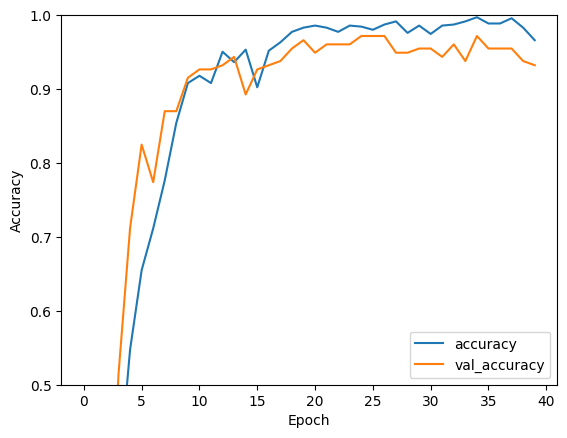

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [30]:
print(test_acc)

0.9322034120559692


In [31]:
filename = 'model.h5'
model.save(filename)

In [38]:
imgP=r
imgt=cv2.imread(imgP)
imgt=cv2.cvtColor(imgt,cv2.COLOR_BGR2RGB)
results = detector.detect_faces(imgt)
print(results)
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height
face = imgt[y1:y2, x1:x2]
#preprocessing
face=cv2.resize(face, (224, 224))
face=face/255
face=np.array(face)
face=np.expand_dims(face,axis=0)
pre=(np.argmax(model.predict(face)))
print(labels.inverse_transform([pre]))

1/1 [==============================] - 0s 28ms/step
[{'box': [220, 513, 872, 1099], 'confidence': 0.9999971389770508, 'keypoints': {'left_eye': (471, 904), 'right_eye': (891, 907), 'nose': (678, 1128), 'mouth_left': (466, 1327), 'mouth_right': (854, 1334)}}]
1/1 [==============================] - 0s 40ms/step
['K_P']
